# **Import Packages**

In [ ]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import seaborn as sns                # based on matplotlib, for statistical graphics
from matplotlib import pyplot as plt # visualization for 2D and 3D plots

from sklearn.preprocessing import LabelEncoder # encoding categorical labels into numerical values
from sklearn.preprocessing import MinMaxScaler # standardize features
from imblearn.over_sampling import SMOTE       # solve imbalance problem via oversampling technique

from sklearn.model_selection import train_test_split # split the dataset into training, testing

# **Preprocessing**

In [ ]:
# Load dataset
df = pd.read_csv('credit_risk_dataset.csv')

# observe first 5 rows of the dataset
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# print number of rows,columns in dataset
df.shape

(32581, 12)

In [ ]:
# Check the column names in the DataFrame
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


**Handling missing values**

In [ ]:
df.info()
'''
we can observe from the output that there are null values
and alse we can see types of each column, memory usage of the dataset, and its shape
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


'\nwe can observe from the output that there are null values\nand alse we can see types of each column, memory usage of the dataset, and its shape\n'

In [ ]:
# summation of null values at each column in the dataset
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# drop null values bc its proportion is appropriate
df.dropna(inplace=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(28638, 12)

**Handling Duplicates**

In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31947,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(28501, 12)

**Handling Data types**

In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
# we changed the data type of the column person_emp_length since it's considered as float and it should be converted into an integer for better results
df['person_emp_length'] = df['person_emp_length'].astype(int)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

**descriptive statistics for numerical and Categorical columns**

In [ ]:
# describe function Summarize Statistics for Numerical data to recognize the nature of our dataset, and to see if there are outliers
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Summary Statistics for Categorical data
df.describe(exclude=[np.number])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28501,28501,28501,28501
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14498,5670,9345,23411


**Check the balance of 'loan_status' column**

In [ ]:
# The count of unique values in the 'loan_status' column
count_values = df['loan_status'].value_counts()
count_values

loan_status
0    22313
1     6188
Name: count, dtype: int64

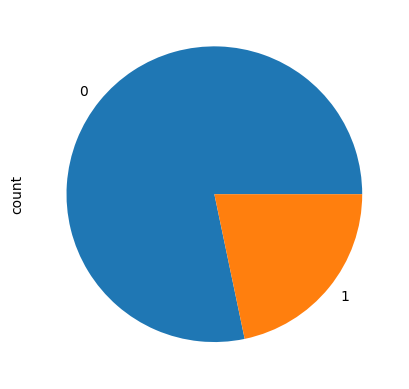

In [ ]:
# plot the balance of classes in the 'loan_status' column
count_values.plot(kind='pie');

<ipython-input-19-961626035f22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=df,palette='RdBu_r')


<Axes: xlabel='loan_status', ylabel='count'>

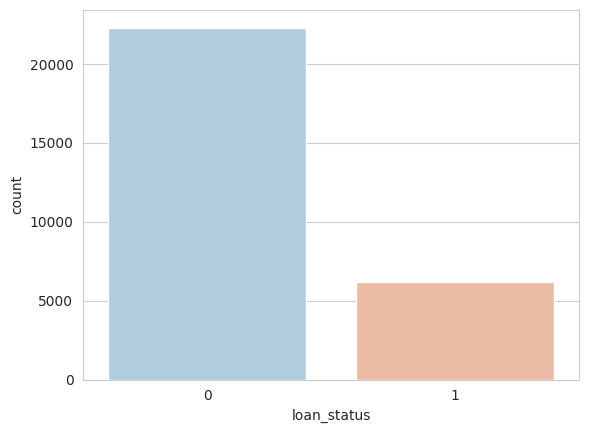

In [ ]:
# another way to plot the balance
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=df,palette='RdBu_r')

We can observe that the count of "0" class is significantly higher than "1" class
We have critical problem here as imbalanced dataset can lead to biased models, where the model may perform poorly in predicting the minority class

 **To solve this problem we must:**
First: encode categorical features
Second: Scaling the numerical features
Third: Split the dataset

**First: encode categorical features**

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in the same DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8,3,2,35000,14.27,1,0.55,1,4


**Second: Scaling the numerical features**

In [ ]:
# initialize the MinMaxScaler
MS = MinMaxScaler()
# fit the scaler on the features and transform them
scaled_features = MS.fit_transform(df)
scaled_features

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=df.columns)

In [ ]:
# display the updated DataFrame with scaled features
scaled_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0.016129,0.009173,1.000000,1.000000,0.8,0.500000,1.000000,0.595506,1.0,0.710843,1.0,0.035714
1,0.008065,0.000934,0.666667,0.040650,0.2,0.166667,0.014493,0.321348,0.0,0.120482,0.0,0.000000
2,0.040323,0.000934,0.000000,0.008130,0.6,0.333333,0.144928,0.418539,1.0,0.686747,0.0,0.035714
3,0.024194,0.010257,1.000000,0.032520,0.6,0.333333,1.000000,0.551124,1.0,0.638554,0.0,0.000000
4,0.032258,0.008406,1.000000,0.065041,0.6,0.333333,1.000000,0.497191,1.0,0.662651,1.0,0.071429


**Third: Split the dataset**

In [ ]:
X = scaled_data.drop(['loan_status'], axis=1)
Y = scaled_data['loan_status']

In [ ]:
print("Sample of X: \n", X.head())
print("Sample of Y: \n", Y.head())

Sample of X: 
    person_age  person_income  person_home_ownership  person_emp_length  \
0    0.016129       0.009173               1.000000           1.000000   
1    0.008065       0.000934               0.666667           0.040650   
2    0.040323       0.000934               0.000000           0.008130   
3    0.024194       0.010257               1.000000           0.032520   
4    0.032258       0.008406               1.000000           0.065041   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0          0.8    0.500000   1.000000       0.595506             0.710843   
1          0.2    0.166667   0.014493       0.321348             0.120482   
2          0.6    0.333333   0.144928       0.418539             0.686747   
3          0.6    0.333333   1.000000       0.551124             0.638554   
4          0.6    0.333333   1.000000       0.497191             0.662651   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0) #split data with 0.25% testing , 0.75% training

**Solve imbalance problem by Resampling Technique**

In [ ]:
# Synthetic Minority Over-sampling Technique (SMOTE)
'''Increase the number of instances in the minority class by generating synthetic samples '''

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Concatenate X_resampled_df and y_resampled_df along the columns axis
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
balanced_df.shape

(44626, 12)

In [ ]:
# The count of unique values in the 'loan_status' column
count_values = balanced_df['loan_status'].value_counts()
count_values

loan_status
1.0    22313
0.0    22313
Name: count, dtype: int64

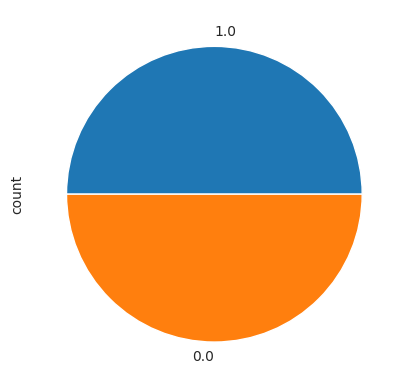

In [ ]:
# plot the balance of classes in the 'loan_status' column
count_values.plot(kind='pie');

**Analyze the correlation between numerical features and the target variable 'loan_status'**

In [ ]:
'''calculate correlation_matrix which is a matrix or a data structure
that contains correlations between  between numerical columns and '' '''
correlation_matrix = balanced_df.corr()

# sort correlations with 'loan_status' in descending order
correlation_with_loan_status = correlation_matrix['loan_status'].sort_values(ascending=False)

# display correlations with 'loan_status'
print(correlation_with_loan_status)

loan_status                   1.000000
loan_grade                    0.420876
loan_percent_income           0.402983
loan_int_rate                 0.400630
person_home_ownership         0.253403
cb_person_default_on_file     0.205426
loan_amnt                     0.129333
cb_person_cred_hist_length   -0.034967
person_age                   -0.047564
loan_intent                  -0.080656
person_emp_length            -0.118880
person_income                -0.202407
Name: loan_status, dtype: float64


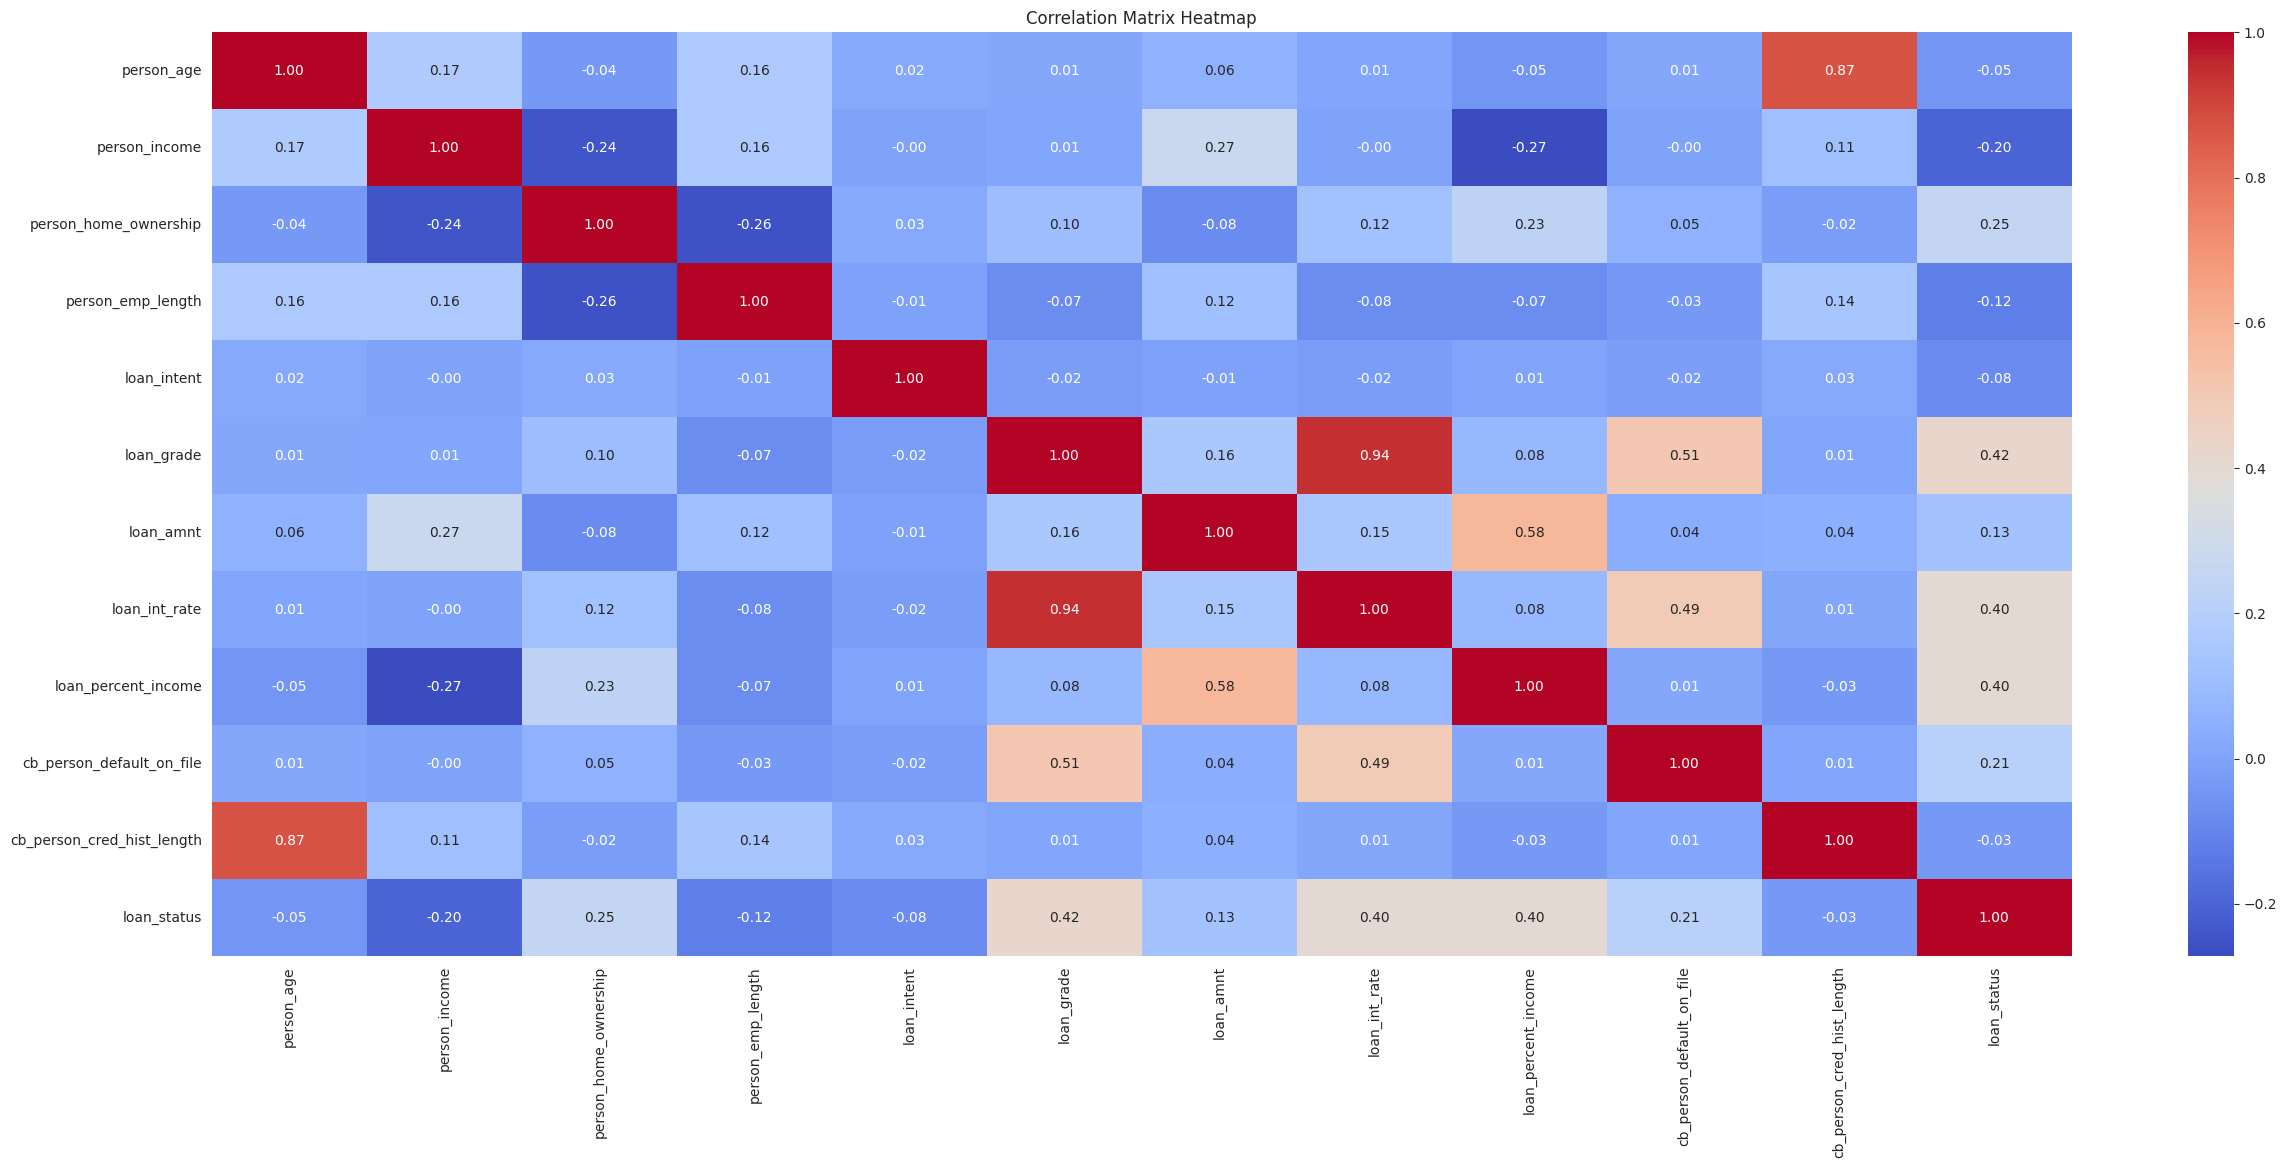

In [ ]:
'''heatmap visualization: each cell's color represents
the strength and direction of correlation between the variables.
Positive correlations --> represented by warmer colors,
negative correlations --> by cooler colors,
and the intensity of the color signifies the magnitude of the correlation.
The annotations within the cells will show the actual correlation values'''
# plotting the heatmap
plt.figure(figsize=(30, 12))
# annot=True: This parameter specifies whether to annotate the heatmap with the numeric values or not.
# fmt=".2f": This parameter specifies the format of the annotations (.2f stands for two decimal places)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Relationships between multiple variables**

In [ ]:
# Pair plot for numerical variables
pair_plot  = sns.pairplot(balanced_df)
# suptitle function from Matplotlib to place the title of the pair plot in a corner
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [ ]:
'''display scatter plots for pairs of numerical variables with KDE plots along the diagonal,
providing additional insights into the distribution of each numerical variable.'''

pair_plot = sns.pairplot(balanced_df, diag_kind='kde')
pair_plot.fig.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

**Identify potential outliers in the numerical columns**

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


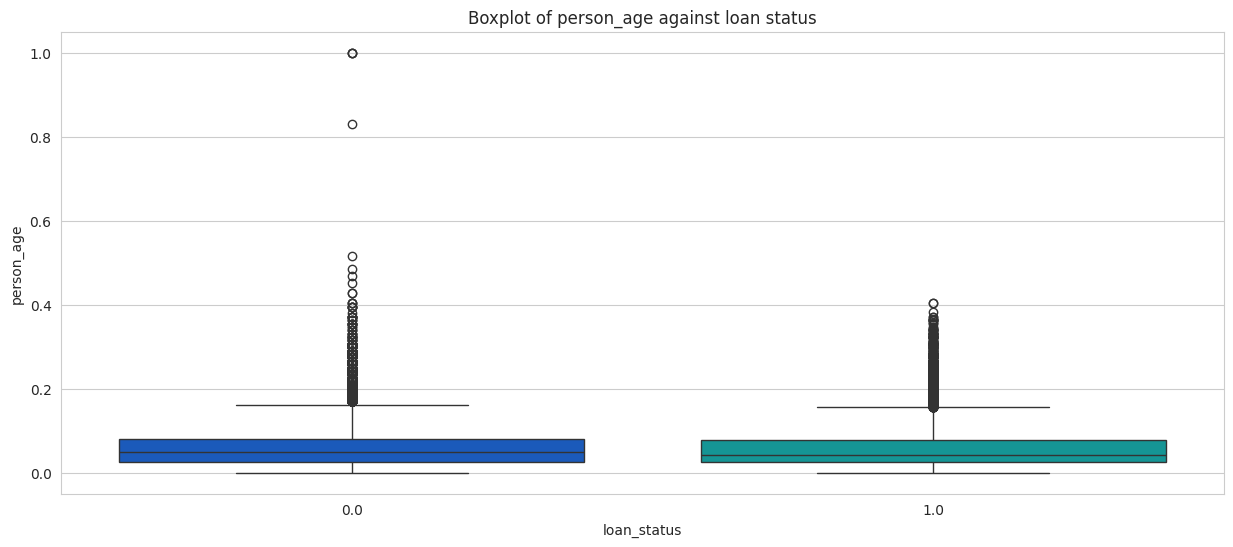

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


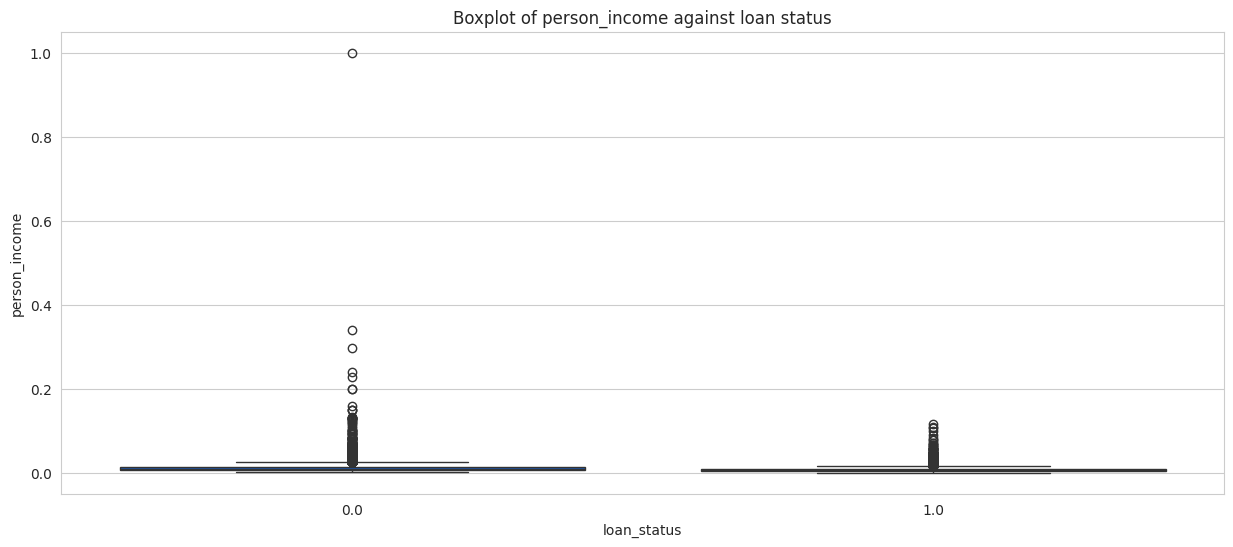

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


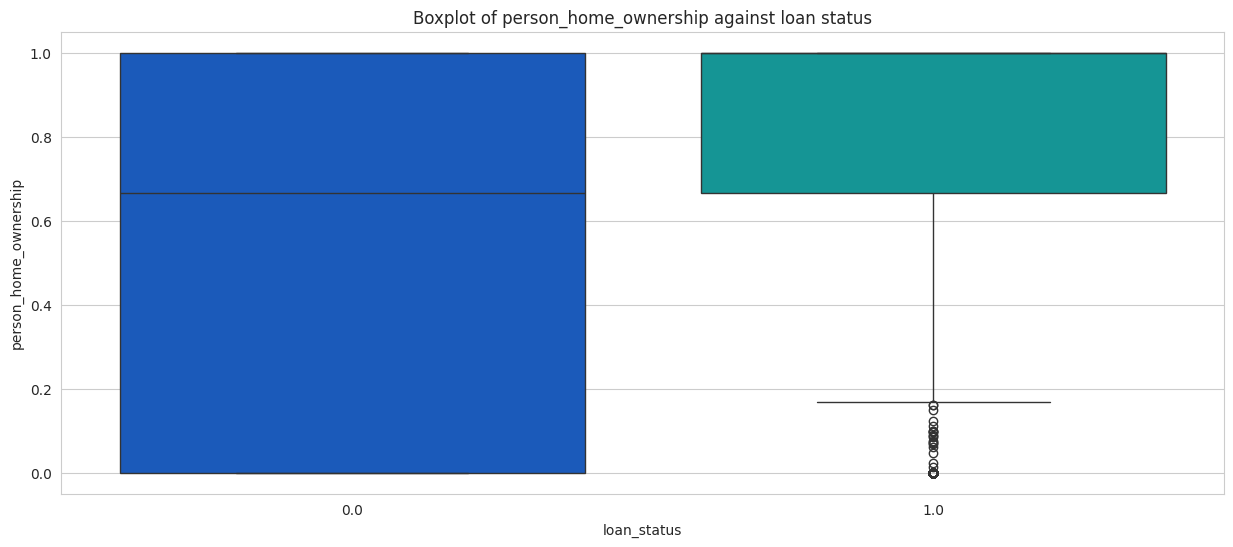

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


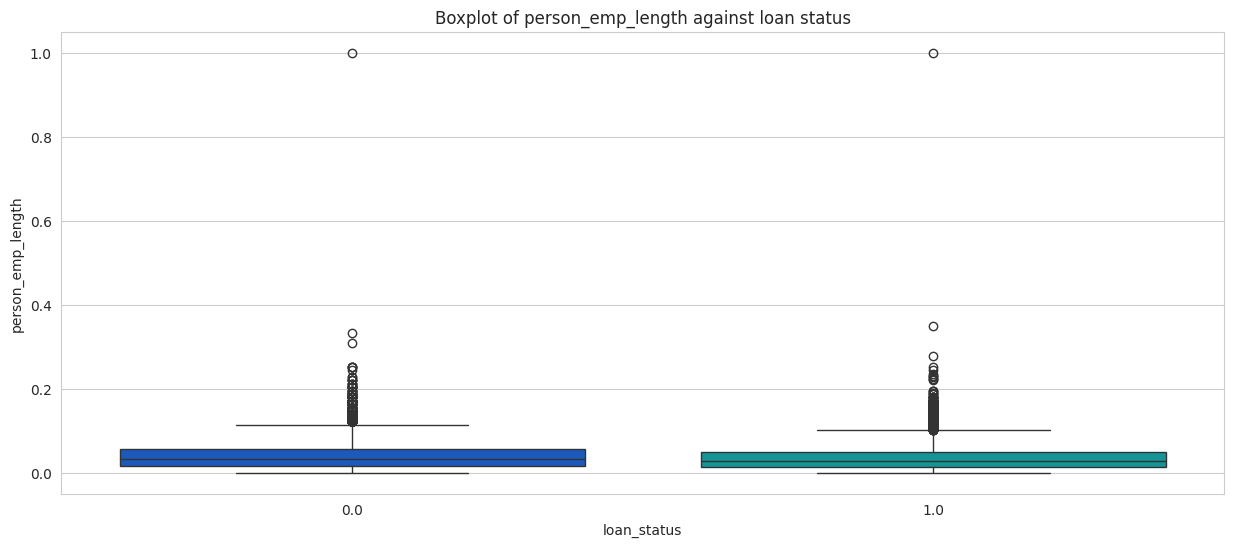

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


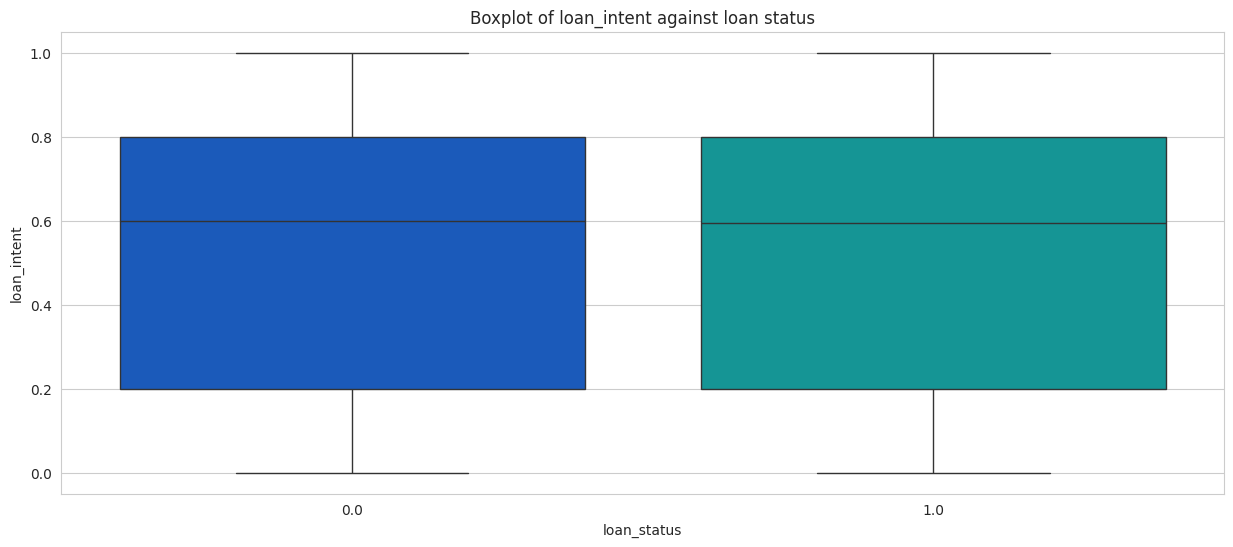

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


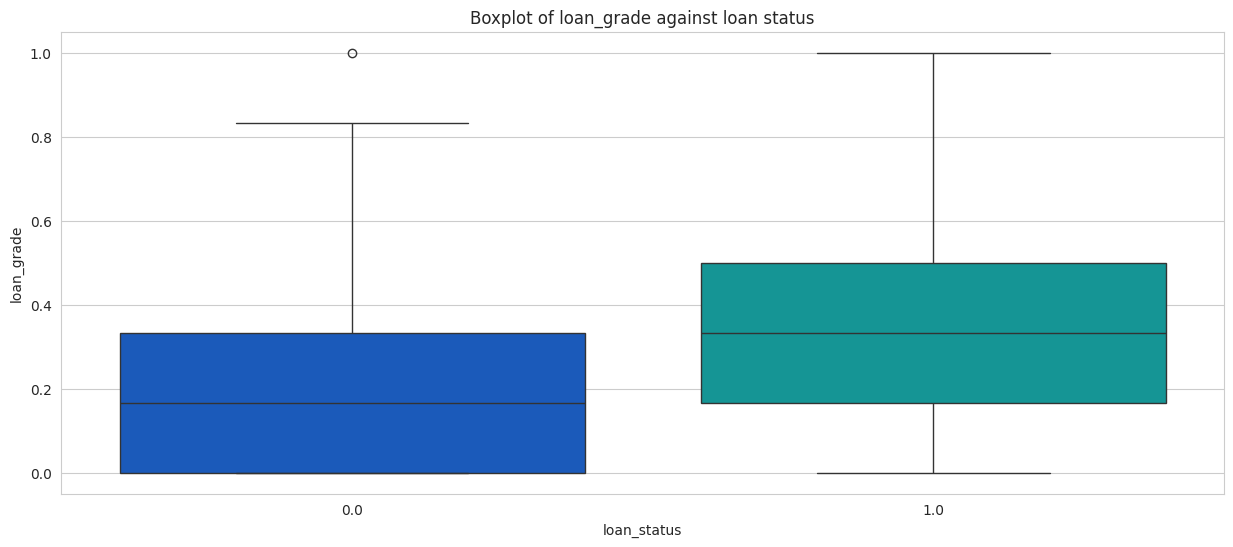

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


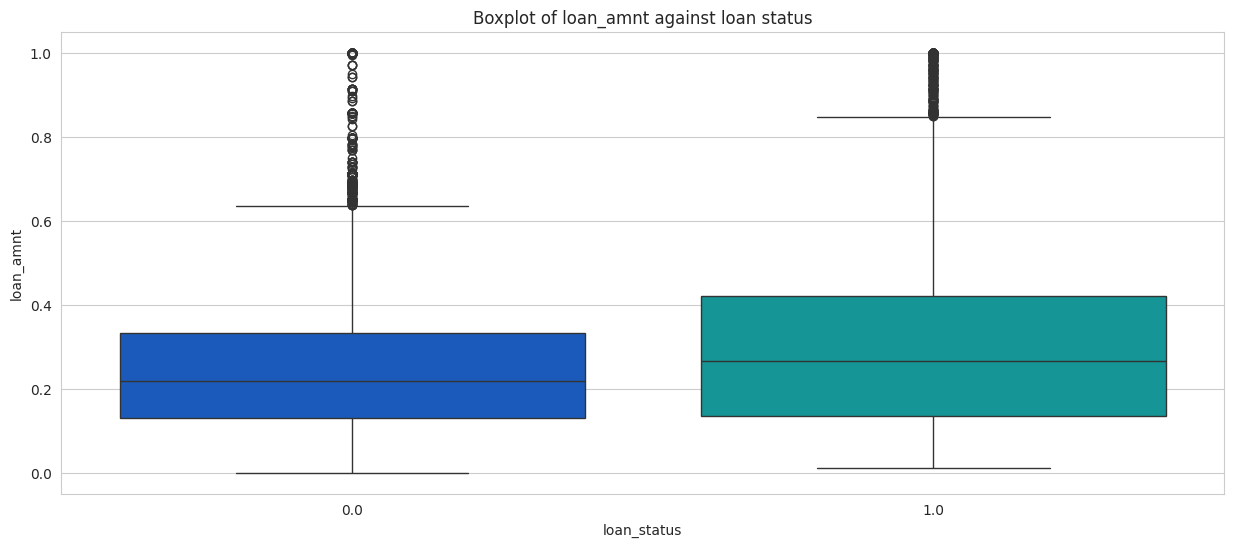

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


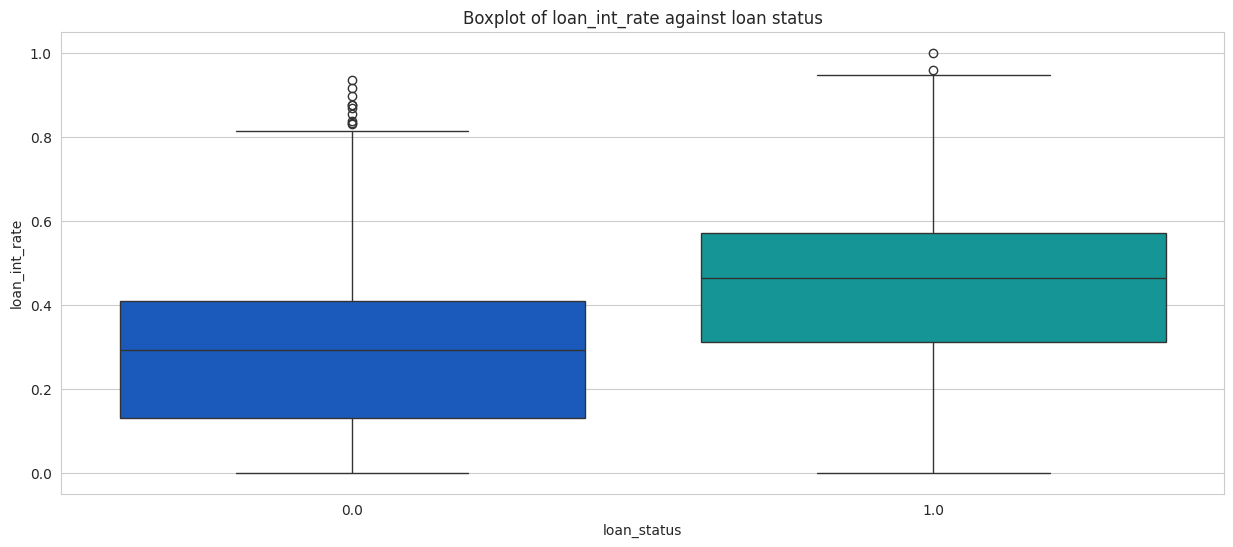

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


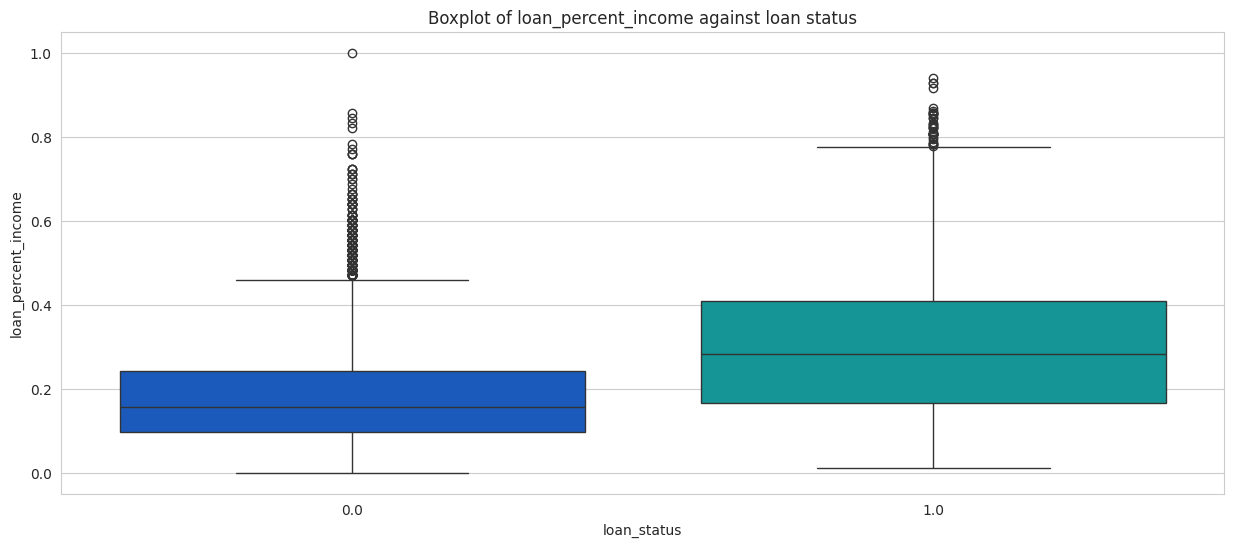

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


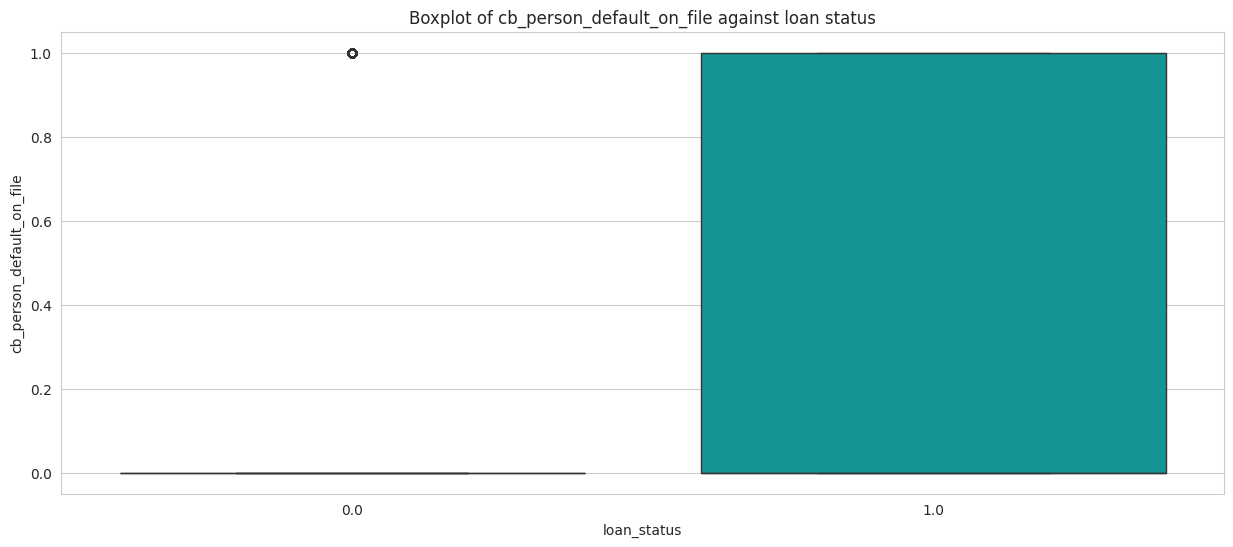

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


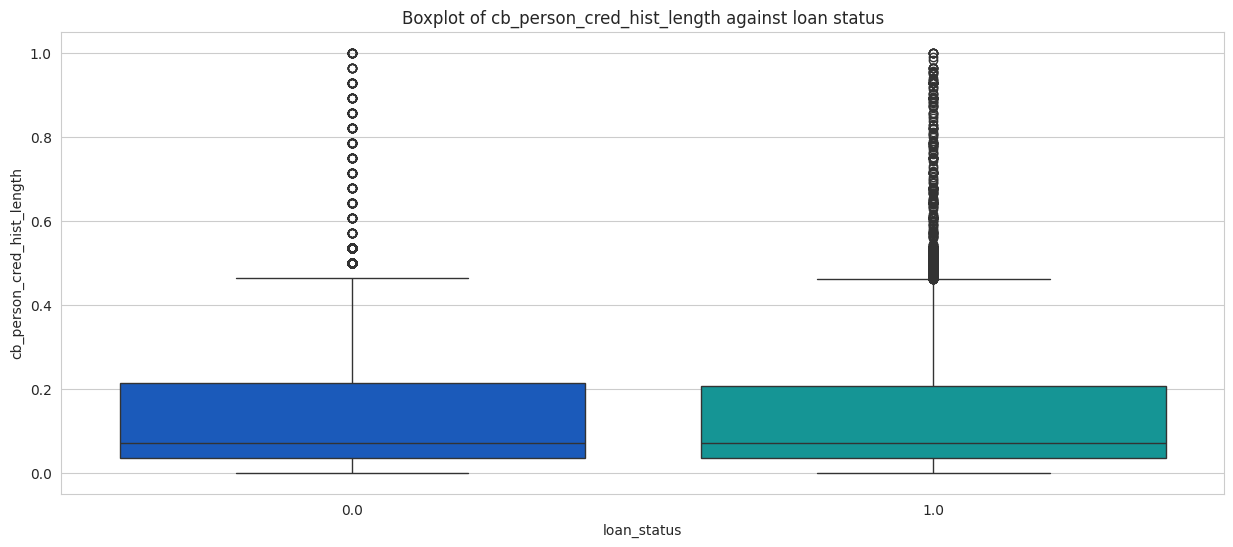

<ipython-input-34-76f29a60c254>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')


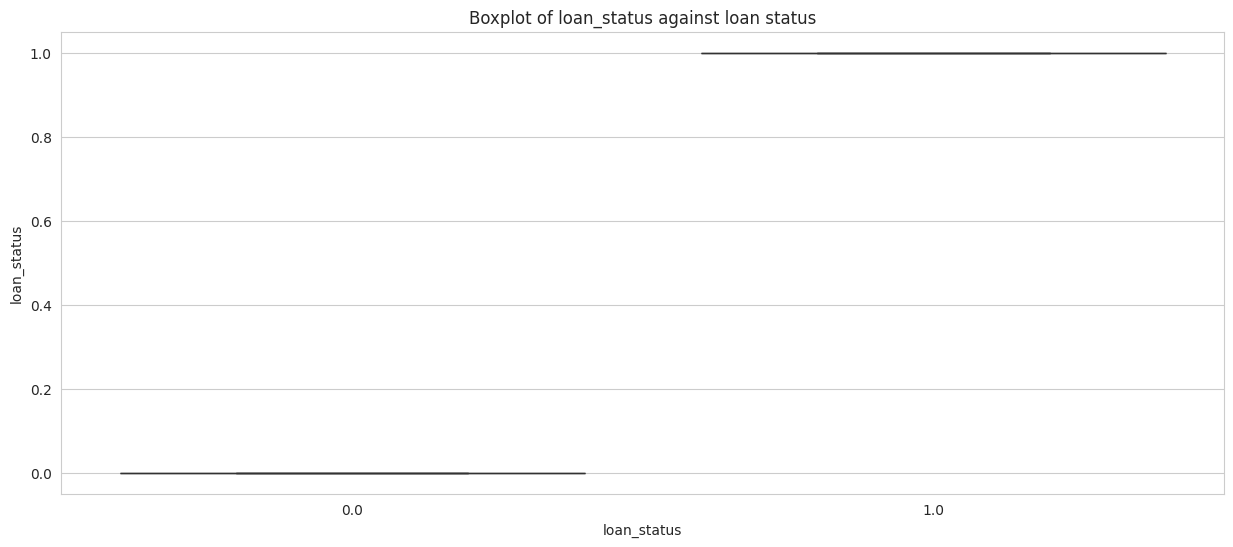

In [ ]:
'''generate a series of boxplots, one for each numerical column in the dataset
to visualize potential outliers'''
for column in balanced_df:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='loan_status', y=column , data=balanced_df, palette='winter')
    plt.title(f'Boxplot of {column} against loan status')
    plt.show()

**Handling outliers with IQR method**

In [ ]:
# we want to identify outliers with accurate numbers instead of depending on our observation
'''outliers are identified using IQR by checking which data points
fall below the lower bound or above the upper bound'''

# Define the remove_outliers function
def remove_outliers(balanced_df, columns, threshold):
    cleaned_data = balanced_df.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

In [ ]:
# we want to identify outliers with accurate numbers instead of depending on our observation
'''outliers are identified using IQR by checking which data points
fall below the lower bound or above the upper bound'''

# Define the iterative_outlier_removal function
def iterative_outlier_removal(balanced_df, columns, threshold=4, max_iterations=2):
    outliers_before_removal = {}
    outliers_after_removal = {}
    cleaned_data = balanced_df.copy()  # Copy of the original dataset
    for i in range(max_iterations):
        outliers_before_removal[i] = {}
        for column in columns:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = cleaned_data[(cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)]
            outliers_before_removal[i][column] = outliers
        cleaned_data = remove_outliers(cleaned_data, columns, threshold)
        outliers_after_removal[i] = {}
        for column in columns:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = cleaned_data[(cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)]
            outliers_after_removal[i][column] = outliers
        # Check if the dataset size has stabilized (no change from previous iteration)
        if i > 0 and len(cleaned_data) == len(prev_cleaned_data):
            break
        prev_cleaned_data = cleaned_data.copy()  # Track the cleaned dataset from the previous iteration
    return cleaned_data, outliers_before_removal, outliers_after_removal

# Define the columns to remove outliers from
columns = balanced_df.columns

# Apply iterative outlier removal
cleaned_data, outliers_before, outliers_after = iterative_outlier_removal(balanced_df, columns, threshold=4, max_iterations=2)

In [ ]:
# Display outliers before and after removal
for iteration, outliers_dict in outliers_before.items():
    print(f"Iteration {iteration + 1}: Outliers before removal")
    for column, outliers in outliers_dict.items():
        print(f"Column '{column}' has {len(outliers)} outliers before removal.")
    print("---------------------------------------------")

for iteration, outliers_dict in outliers_after.items():
    print(f"Iteration {iteration + 1}: Outliers after removal")
    for column, outliers in outliers_dict.items():
        print(f"Column '{column}' has {len(outliers)} outliers after removal.")
    print("---------------------------------------------")

Iteration 1: Outliers before removal
Column 'person_age' has 106 outliers before removal.
Column 'person_income' has 391 outliers before removal.
Column 'person_home_ownership' has 0 outliers before removal.
Column 'person_emp_length' has 46 outliers before removal.
Column 'loan_intent' has 0 outliers before removal.
Column 'loan_grade' has 0 outliers before removal.
Column 'loan_amnt' has 0 outliers before removal.
Column 'loan_int_rate' has 0 outliers before removal.
Column 'loan_percent_income' has 0 outliers before removal.
Column 'cb_person_default_on_file' has 10174 outliers before removal.
Column 'cb_person_cred_hist_length' has 67 outliers before removal.
Column 'loan_status' has 0 outliers before removal.
---------------------------------------------
Iteration 2: Outliers before removal
Column 'person_age' has 0 outliers before removal.
Column 'person_income' has 4 outliers before removal.
Column 'person_home_ownership' has 0 outliers before removal.
Column 'person_emp_length'

In [ ]:
cleaned_data.shape

(34029, 12)

In [ ]:
# Accessing outliers for columns and storing lower and upper bounds
lower_upper_bounds = {}  # Dictionary to store lower and upper bounds for columns
for column in df:
    lower_upper_bounds[column] = (df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)),
                                  df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))

In [ ]:
# Printing lower and upper bounds for 'person_income'
print("Lower bound for person_income:", lower_upper_bounds['person_income'][0])
print("Upper bound for person_income:", lower_upper_bounds['person_income'][1])

Lower bound for person_income: -21250.0
Upper bound for person_income: 140750.0


In [ ]:
# Printing outliers found for 'person_income' before removal
print("\nOutliers found for 'person_income' before removal:")
for iteration, outliers_dict in outliers_before.items():
    print(f"Iteration {iteration + 1}: Outliers before removal")
    for column, outliers in outliers_dict.items():
        if column == 'person_income':  # Check if the column is 'person_income'
            print(outliers)  # Print outliers for 'person_income'
    print("---------------------------------------------")


Outliers found for 'person_income' before removal:
Iteration 1: Outliers before removal
       person_age  person_income  person_home_ownership  person_emp_length  \
15       0.024194       0.082722               0.000000           0.056911   
33       0.040323       0.050367               1.000000           0.016260   
34       0.048387       0.049366               0.000000           0.081301   
41       0.048387       0.049366               0.000000           0.081301   
42       0.024194       0.049366               0.666667           0.008130   
...           ...            ...                    ...                ...   
43797    0.088153       0.042822               1.000000           0.014971   
43860    0.109535       0.044067               0.000000           0.026448   
43925    0.129032       0.040502               0.060925           0.122651   
43930    0.081279       0.037115               0.000000           0.111905   
44460    0.052027       0.037807               0.0000

In [ ]:
# Printing outliers found for 'person_income' after removal
print("\nOutliers found for 'person_income' after removal:")
for iteration, outliers_dict in outliers_after.items():
    print(f"Iteration {iteration + 1}: Outliers after removal")
    for column, outliers in outliers_dict.items():
        if column == 'person_income':  # Check if the column is 'person_income'
            print(outliers)  # Print outliers for 'person_income'
    print("---------------------------------------------")


Outliers found for 'person_income' after removal:
Iteration 1: Outliers after removal
       person_age  person_income  person_home_ownership  person_emp_length  \
13973    0.048387       0.036163                    0.0           0.081301   
14260    0.048387       0.036163                    0.0           0.081301   
36550    0.222374       0.036225                    0.0           0.000865   
43623    0.057298       0.036087                    1.0           0.016260   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
13973     1.000000    0.166667   0.246377       0.328090             0.048193   
14260     0.800000    0.166667   0.246377       0.328090             0.048193   
36550     0.410642    0.500000   0.710145       0.554183             0.138941   
43623     0.200000    0.827500   0.707304       0.725798             0.134217   

       cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
13973                        0.0        

In [ ]:
# The count of unique values in the 'loan_status' column
count_values = cleaned_data['loan_status'].value_counts()
count_values

loan_status
0.0    18825
1.0    15204
Name: count, dtype: int64

# **Building the model**

In [ ]:
import tensorflow as tf #for the model building
from sklearn.metrics import classification_report, confusion_matrix #for the classification report

In [ ]:
# Define the neural network architecture with additional layers and regularization
model = tf.keras.Sequential([
    # Input layer with 128 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X.shape[1],)),
    # Dropout layer with dropout rate of 0.5 to prevent overfitting
    tf.keras.layers.Dropout(0.5),
    # Hidden layer with 64 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    # Hidden layer with 32 neurons, ReLU activation function, and L2 regularization
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    # Output layer with 1 neuron and sigmoid activation function for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
334/334 [==============================] - 3s 4ms/step - loss: 0.5795 - accuracy: 0.7873 - val_loss: 0.4430 - val_accuracy: 0.8461
Epoch 2/20
334/334 [==============================] - 1s 4ms/step - loss: 0.4553 - accuracy: 0.8307 - val_loss: 0.3976 - val_accuracy: 0.8577
Epoch 3/20
334/334 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8422 - val_loss: 0.3760 - val_accuracy: 0.8639
Epoch 4/20
334/334 [==============================] - 1s 4ms/step - loss: 0.4043 - accuracy: 0.8501 - val_loss: 0.3622 - val_accuracy: 0.8688
Epoch 5/20
334/334 [==============================] - 2s 5ms/step - loss: 0.3943 - accuracy: 0.8537 - val_loss: 0.3577 - val_accuracy: 0.8712
Epoch 6/20
334/334 [==============================] - 2s 5ms/step - loss: 0.3890 - accuracy: 0.8579 - val_loss: 0.3533 - val_accuracy: 0.8710
Epoch 7/20
334/334 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8591 - val_loss: 0.3468 - val_accuracy: 0.8733
Epoch 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

223/223 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8901
Test Accuracy: 0.8901206851005554


In [ ]:
# Predict probabilities on test data
y_pred_probs = model.predict(x_test)

# Threshold probabilities to get predicted classes
y_pred = (y_pred_probs > 0.5).astype(int)


223/223 [==============================] - 1s 2ms/step


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      5594
         1.0       0.85      0.59      0.70      1532

    accuracy                           0.89      7126
   macro avg       0.87      0.78      0.82      7126
weighted avg       0.89      0.89      0.88      7126



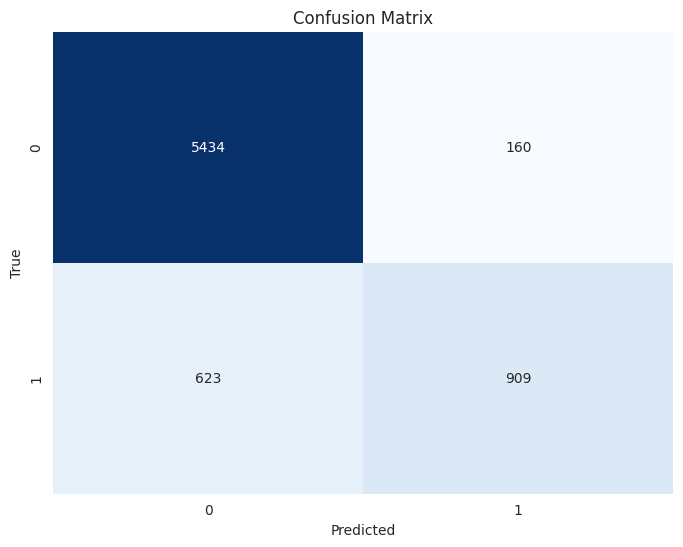

In [ ]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Enhancing the model**;

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((x_train.shape[1], 1), input_shape=(x_train.shape[1],)),  # Reshape input for convolutional layer
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        # Spatial Pyramid Pooling layer
        tf.keras.layers.GlobalAveragePooling1D(),  # Global Average Pooling
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Create  neural network model
model_1 = create_model()


# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model_1.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
134/134 [==============================] - 3s 24ms/step - loss: 0.2537 - accuracy: 0.9093 - val_loss: 0.2581 - val_accuracy: 0.9062
Epoch 2/50
134/134 [==============================] - 4s 26ms/step - loss: 0.2491 - accuracy: 0.9102 - val_loss: 0.2441 - val_accuracy: 0.9146
Epoch 3/50
134/134 [==============================] - 3s 21ms/step - loss: 0.2473 - accuracy: 0.9120 - val_loss: 0.2491 - val_accuracy: 0.9151
Epoch 4/50
134/134 [==============================] - 3s 22ms/step - loss: 0.2462 - accuracy: 0.9116 - val_loss: 0.2684 - val_accuracy: 0.9050
Epoch 5/50
134/134 [==============================] - 3s 22ms/step - loss: 0.2448 - accuracy: 0.9145 - val_loss: 0.2449 - val_accuracy: 0.9146


In [ ]:
# Predict probabilities on test data
y_pred_probs = model_1.predict(x_test)

# Threshold probabilities to get predicted classes
y_pred = (y_pred_probs > 0.5).astype(int)

223/223 [==============================] - 1s 3ms/step


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5594
         1.0       0.89      0.68      0.77      1532

    accuracy                           0.91      7126
   macro avg       0.90      0.83      0.86      7126
weighted avg       0.91      0.91      0.91      7126



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

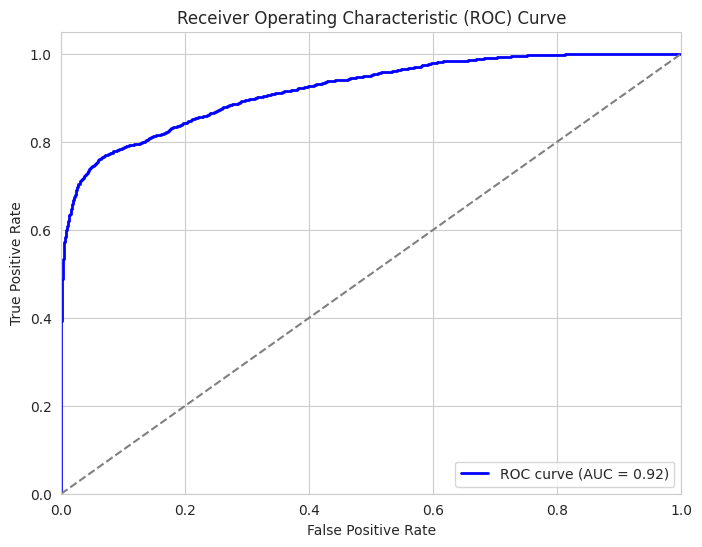

In [ ]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()